**Problem Statement:**
> Analyze the Netflix dataset containing the data about the content which is available on the streaming platform.

> Perform the EDA, create visualizations, derive valuable insights and understand the behaviours and patterns in order to help the business professionals in deciding which type of shows to produce and how to grow the business.




# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from wordcloud import STOPWORDS

# Downloading of the csv data and basic analysis

In [2]:
data = pd.read_csv('netflix.csv')

***Observation about the data ***
columns having grouped data:
director, cast, country, listed_in

In [3]:
data.shape

(8807, 12)

We can see that there are 8807 rows and 12 columns in the dataset.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


All the columns except release_year are of the data type 'object'.


In [5]:
data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


This describe() function tells us the statistical summary about the continuous variable which is only release_year in the original dataset.

>There are 8807 rows for this column, mean value present in the data is 2014 and we have values ranging from 1925 to 2021.

>Also, 25% of values are 2013, 50% are 2017 and 75% are 2019.

#Handling Missing Data


In [6]:
#No of missing values present in each column
data.isna().sum(axis = 0)

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

The columns with missing values:
>categorical type: director, cast, country, rating

>continuous type: date_added, duration

In [7]:
data['duration'] = data['duration'].str.split(' ').str[0]

We have converted the column 'duration' to have only the integer values i.e
> e.g. for rows having movie data, '90 min' converted to 90

> e.g. for rows having tv shows data, '3 seasons' converted to 3

So now, the data type of duration is int and it is a continuous variable.


In [8]:
columns_with_missing_values = data.columns[data.isna().any(axis = 0)]

for column in columns_with_missing_values:
  if column in ['duration', 'date_added']:
    print('\n' + ' Replacing ' + str(data[column].isna().sum(axis = 0)) + ' missing values for column ' + column + ' with ' + '0')
    data[column].fillna(0, inplace = True)
  else:
    print('\n' + ' Replacing ' + str(data[column].isna().sum(axis = 0)) + ' missing values for column ' + column + ' with ' + '"' + 'Unknown ' + column + '"')
    data[column].fillna('Unknown ' + column, inplace = True)



 Replacing 2634 missing values for column director with "Unknown director"

 Replacing 825 missing values for column cast with "Unknown cast"

 Replacing 831 missing values for column country with "Unknown country"

 Replacing 10 missing values for column date_added with 0

 Replacing 4 missing values for column rating with "Unknown rating"

 Replacing 3 missing values for column duration with 0


In [9]:
#No of missing values present in each column
data.isna().sum(axis = 0)

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Now, there are no missing values present in any of the columns. We have filled the missing values in this way:
>categorical variables filled with 'unknown column_name'. For e.g. 'Unknown director', 'Unknown country' etc.

>continuous variables filled with 0

In [10]:
data['duration'] = data['duration'].astype(int)

We have converted the data type for the 'duration' column from string to int as it is having only integer values after transformation.

#Visual Analysis

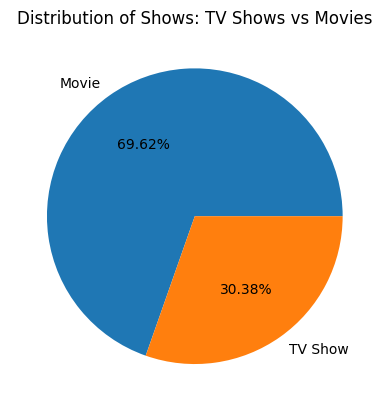

In [11]:
show_type_data = data['type'].value_counts()

labels = show_type_data.index
sizes = show_type_data.values

plt.pie(sizes, labels = labels, autopct = '%.2f%%' )
plt.title('Distribution of Shows: TV Shows vs Movies')
plt.show()

The above figure tells us that there is more data for Movies than TV shows.

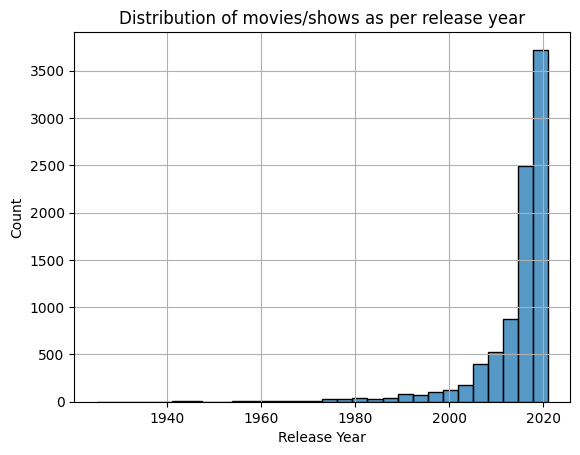

In [12]:
sns.histplot(data = data, x = 'release_year', bins = 30)
plt.grid(True)
plt.xlabel('Release Year')
plt.title('Distribution of movies/shows as per release year')
plt.show()

The above figure tells us that most of the content which is avalilable on Netflix was released between 2000 and 2020.

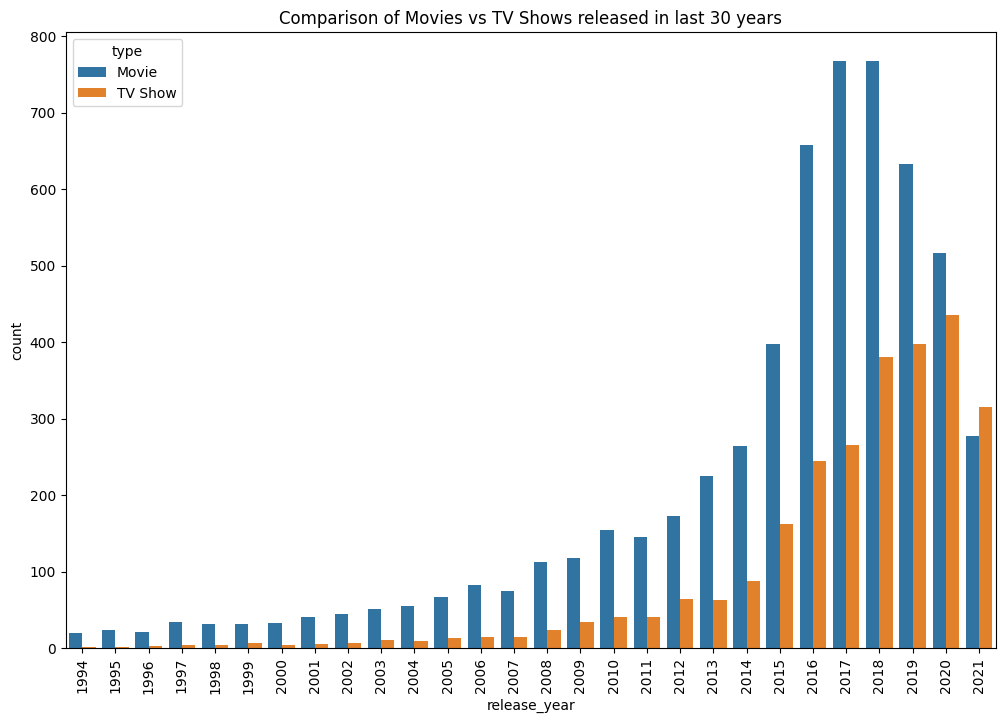

In [13]:
plt.figure(figsize=(12, 8))
sns.countplot(data = data[data['release_year'] > pd.Timestamp.now().year - 30], x = 'release_year', hue = 'type')
plt.xticks(rotation = 90)
plt.title('Comparison of Movies vs TV Shows released in last 30 years')
plt.show()

1. The above figure tells us that over the last 30 years, the number of Movies and TV shows produced have significantly increased.
2. Also, we can see that from the COVID years i.e. 2019 onwards, the movies produced have lessened and TV shows produced have significantly increased.

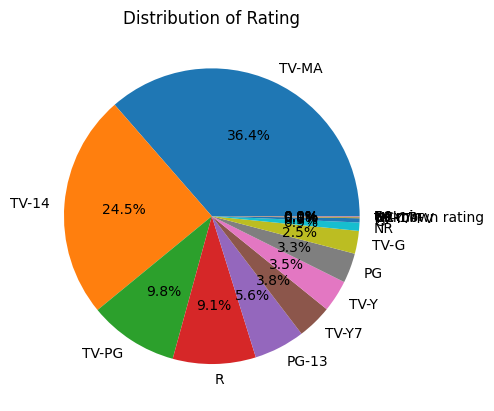

In [14]:
show_type_data = data['rating'].value_counts()

labels = show_type_data.index
sizes = show_type_data.values

plt.pie(sizes, labels = labels, autopct = '%1.1f%%' )
plt.title('Distribution of Rating')
plt.show()

The above figure tells us that most of the content belongs to ratings: TV-MA, TV-14 and TV-PG.

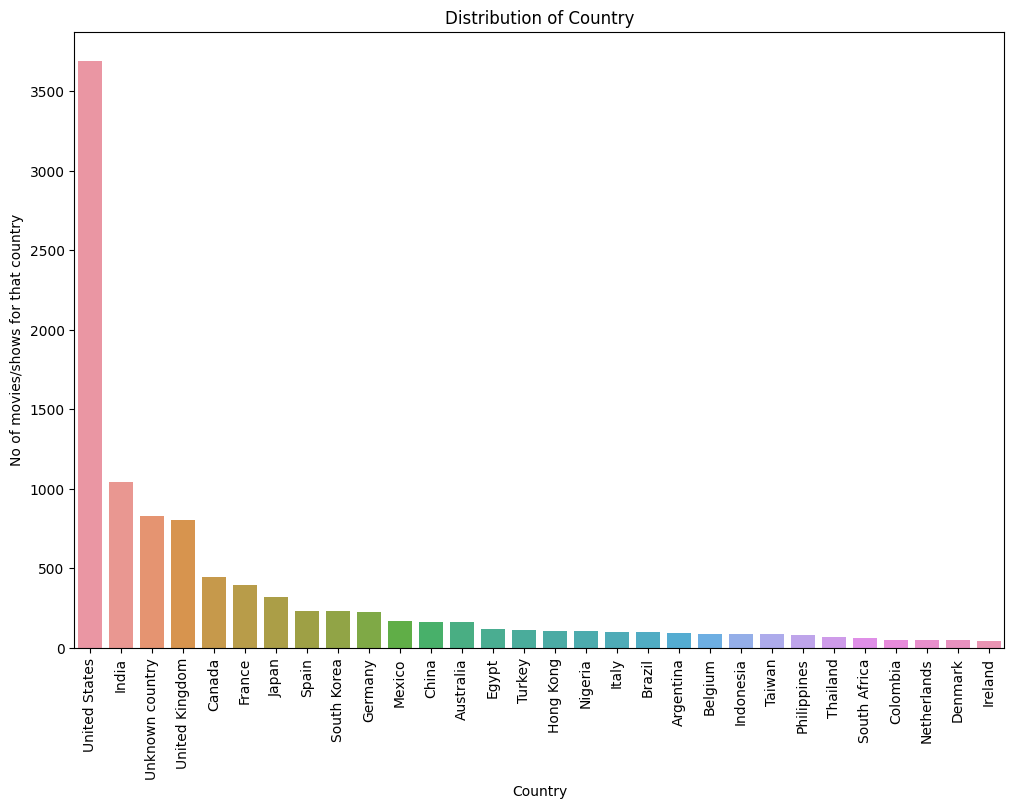

In [15]:
#Since 'country' column has grouped data so ungrouping that and then applying the value_counts
country_data = data['country'].apply(lambda x: x.split(', '))
country_data = [value for sublist in country_data for value in sublist]
country_counts = pd.Series(country_data).value_counts()
top_30_country_data = country_counts.sort_values(ascending = False).head(30)
plt.figure(figsize = (12, 8))
sns.barplot(x = top_30_country_data.index, y = top_30_country_data.values)
plt.xlabel('Country')
plt.xticks(rotation = 90)
plt.ylabel('No of movies/shows for that country')
plt.title('Distribution of Country')
plt.show()

The above figure tells us that most content is produced in the country 'US' followed by 'India' but the gap between the two is humongous.

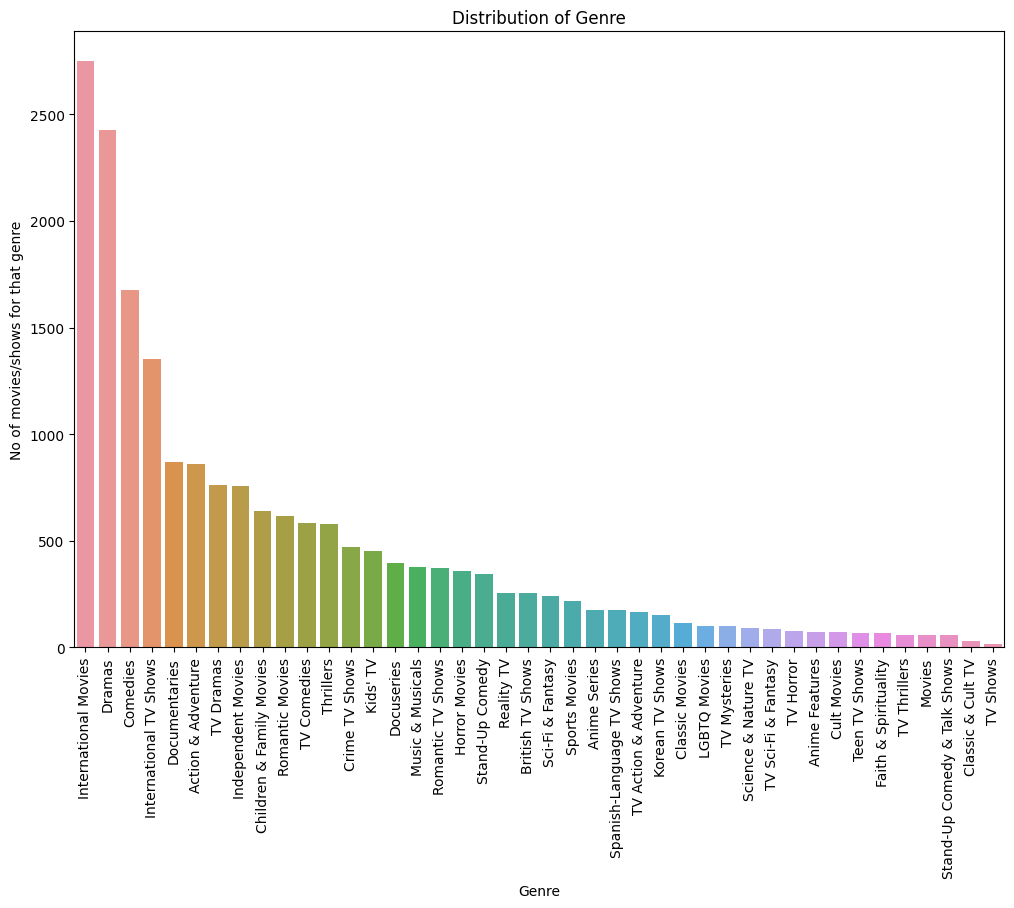

In [16]:
#Since 'listed_in' column has grouped data so ungrouping that and then applying the value_counts
genre_data = data['listed_in'].apply(lambda x: x.split(', '))
genre_data = [value for sublist in genre_data for value in sublist]
genre_counts = pd.Series(genre_data).value_counts()
top_10_genre_counts = genre_counts.sort_values(ascending = False)
plt.figure(figsize = (12, 8))
sns.barplot(x = top_10_genre_counts.index, y = top_10_genre_counts.values)
plt.xlabel('Genre')
plt.xticks(rotation = 90)
plt.ylabel('No of movies/shows for that genre')
plt.title('Distribution of Genre')
plt.show()

The above figure tells us that International Movies and TV Shows, Dramas and Comedies are the most popular genres.

<ipython-input-17-f7663242906a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['type'] == 'Movie']['duration'])


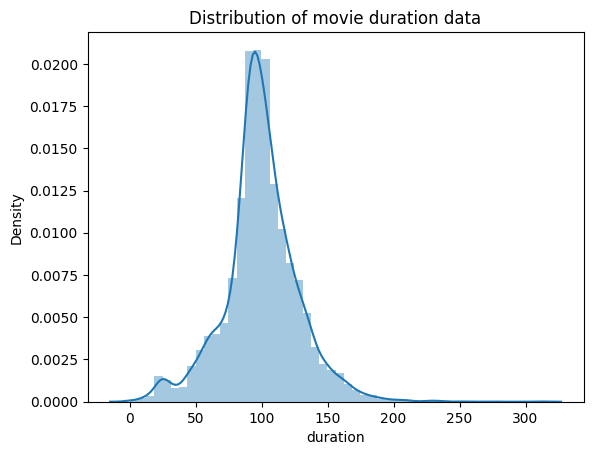

In [17]:
sns.distplot(data[data['type'] == 'Movie']['duration'])
plt.title('Distribution of movie duration data')
plt.show()

Above figure tells us that most of the movies are of the duration which is in the range of 100 to 150 mins.

<ipython-input-18-7915f29f05da>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['type'] == 'TV Show']['duration'])


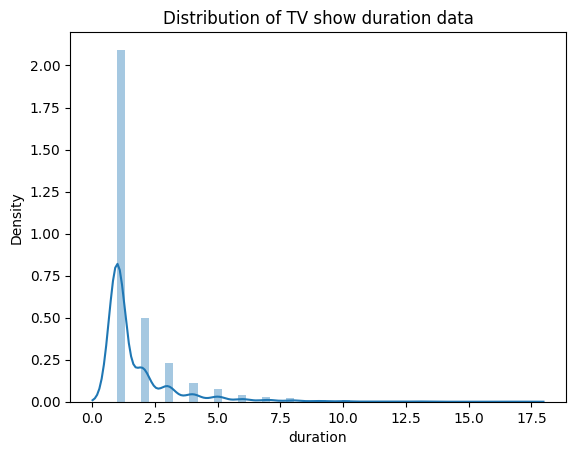

In [18]:
sns.distplot(data[data['type'] == 'TV Show']['duration'])
plt.title('Distribution of TV show duration data')
plt.show()

Above figure tells us that most of the TV Shows are having 1 or 2 seasons.

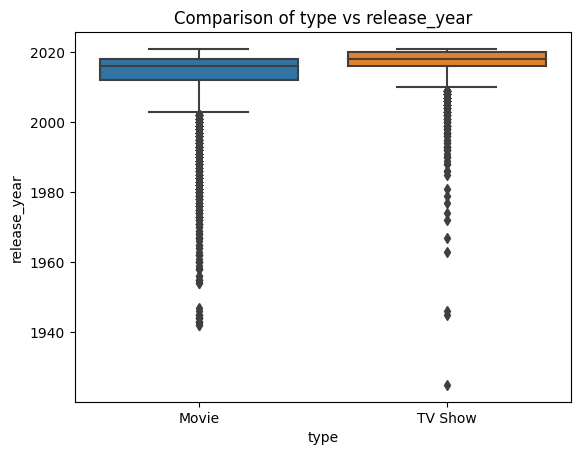

In [19]:
sns.boxplot(data = data, x = 'type', y = 'release_year')
plt.title('Comparison of type vs release_year')
plt.show()

The above figure tells us that the median for the year in which the content was released is slightly higher for TV shows than the Movies.

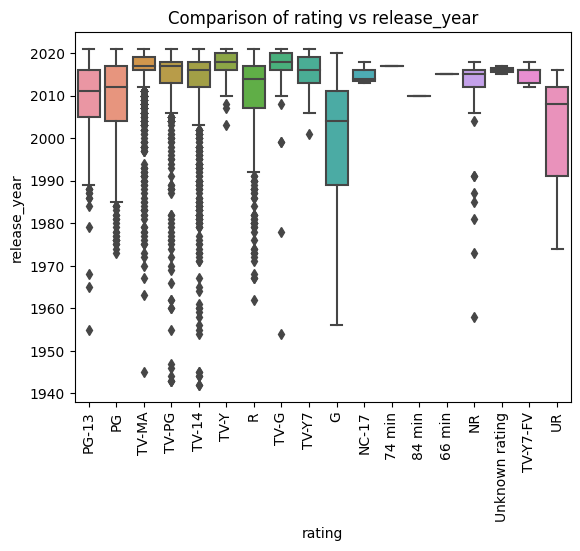

In [20]:
sns.boxplot(data = data[data['type'] == 'Movie'], y = 'release_year', x = 'rating')
plt.xticks(rotation = 90)
plt.title('Comparison of rating vs release_year')
plt.show()

The above figure tells us that except for the ratings 'G' and 'UR', the content of other ratings is mostly released in the last 10 years

<ipython-input-21-9faa4b3cd02a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.loc[data['type'] == 'Movie'].corr(), annot = True)


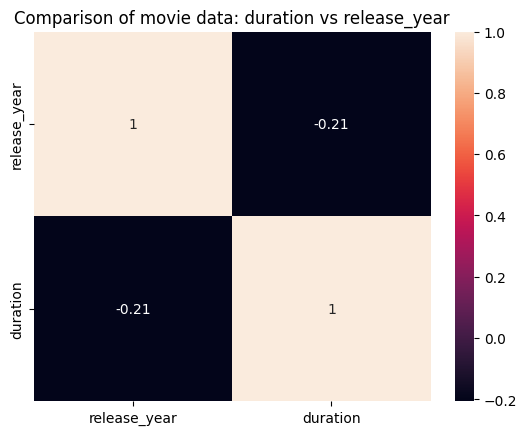

In [21]:
sns.heatmap(data.loc[data['type'] == 'Movie'].corr(), annot = True)
plt.title('Comparison of movie data: duration vs release_year')
plt.show()

The above figure tells us that as the years passed the duration of movies have lessened and thus the negative correlation number -0.21 is there.

<ipython-input-22-8f70d39ae99e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.loc[data['type'] == 'TV Show'].corr(), annot = True)


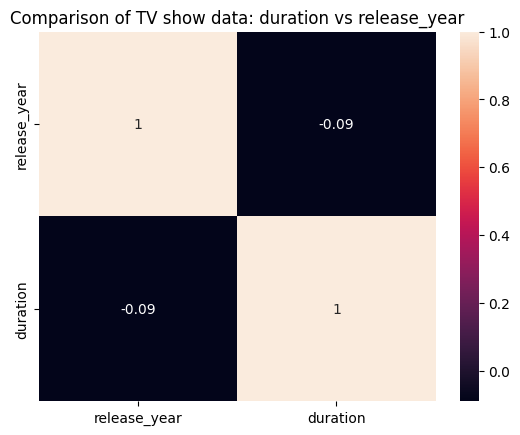

In [22]:
sns.heatmap(data.loc[data['type'] == 'TV Show'].corr(), annot = True)
plt.title('Comparison of TV show data: duration vs release_year')
plt.show()

The above figure tells us that as the years passed the number of seasons for the TV shows have slightly decreased thus the negative correlation number -0.09

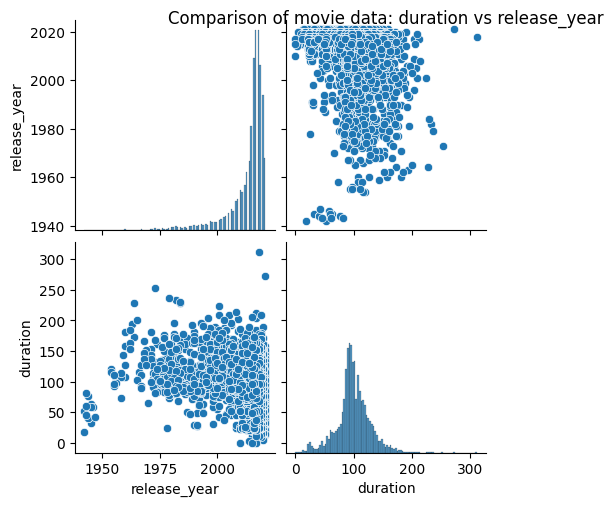

In [23]:
sns.pairplot(data.loc[data['type'] == 'Movie'])
plt.title(label = 'Comparison of movie data: duration vs release_year', loc = 'center', y = 2.0)
plt.show()

The above figure tells us that we have more data points for the Movies for years post 2000 and duration of these movies is not more than 200 mins.

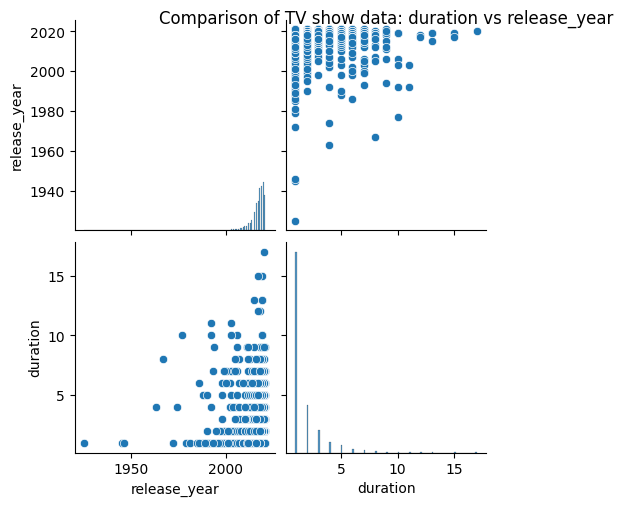

In [24]:
sns.pairplot(data.loc[data['type'] == 'TV Show'])
plt.title('Comparison of TV show data: duration vs release_year', loc = 'center', y = 2.0)
plt.show()

The above figure tells us that we have more data points for the TV Shows for years post 2000 and duration of these TV shows is not more than 5 seasons.

#Ungrouping of Data

In [25]:
columns_with_grouped_data = ['director', 'cast', 'country', 'listed_in']
for col in columns_with_grouped_data:
  data[col] = data[col].apply(lambda x : x.split(', '))
  data = data.explode(col)

In [26]:
data.shape

(201991, 12)

We can see that after ungrouping the data for the columns having grouped values, the row count has become 201991 as compared to original row count which is 8807 i.e. ~2200% increase in the rows.

#Unique Value Analysis

In [27]:
for column in data.columns:
  list_of_unique_values = data[column].unique()

  if len(list_of_unique_values) <= 20:
    print('\n' + column + ' : ' + str(len(list_of_unique_values)) + ' Unique Values ')
    print(list_of_unique_values)
  else:
    print('\n' + column + ' : ' + str(len(list_of_unique_values)) + ' Unique Values ')



show_id : 8807 Unique Values 

type : 2 Unique Values 
['Movie' 'TV Show']

title : 8807 Unique Values 

director : 4994 Unique Values 

cast : 36440 Unique Values 

country : 128 Unique Values 

date_added : 1768 Unique Values 

release_year : 74 Unique Values 

rating : 18 Unique Values 
['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' '74 min' '84 min' '66 min' 'NR' 'Unknown rating' 'TV-Y7-FV' 'UR']

duration : 211 Unique Values 

listed_in : 42 Unique Values 

description : 8775 Unique Values 


This tells us that we have data for 8807 shows (Movie/TV) among 42 genres with 18 unique show ratings and spanning across 128 countries.

#Segregation of data for movies and TV shows

##Movie Data

In [28]:
movies_data = data[data['type'] == 'Movie']

In [29]:
movies_data.shape

(145843, 12)

In [30]:
movies_data['title'].nunique()

6131

We have data for 6131 unique movies in the dataset.

##TV Show Data

In [31]:
tv_show_data = data[data['type'] == 'TV Show']

In [32]:
tv_show_data.shape

(56148, 12)

In [33]:
tv_show_data['title'].nunique()

2676

We have data for 2676 unique TV shows in the dataset.

#Country wise movies/shows produced

##Top 10 countries as per movies produced

In [34]:
movies_data_grouped = movies_data[movies_data['country'] != 'Unknown country'].groupby(['country']).agg({'title':[('title_count', 'nunique')]})
movies_data_grouped.columns = movies_data_grouped.columns.droplevel()
movies_data_grouped.sort_values('title_count', ascending = False).head(10)

,title_count
country,
United States,2751
India,962
United Kingdom,532
Canada,319
France,303
Germany,182
Spain,171
Japan,119
China,114


Above results tell us that 'United States' is the country in which the maximum number of movies are produced. Also, we have ignored the rows having the value unknown as it won't give us any insight.

##Top 10 countries as per shows produced

In [35]:
tv_show_data_grouped = tv_show_data[tv_show_data['country'] != 'Unknown country'].groupby(['country']).agg({'title':[('title_count', 'nunique')]})
tv_show_data_grouped.columns = tv_show_data_grouped.columns.droplevel()
tv_show_data_grouped.sort_values('title_count', ascending = False).head(10)

,title_count
country,
United States,938
United Kingdom,272
Japan,199
South Korea,170
Canada,126
France,90
India,84
Taiwan,70
Australia,66


Above results tell us that 'United States' is the country in which the maximum number of TV shows are produced. Also, we have ignored the rows having the value unknown as it won't give us any insight.

#Analysis of actors/directors

##Top 10 movie directors

***Top 10 directors as per the no of movies listed on Netflix***



In [36]:
popular_directors_movies = movies_data[movies_data['director'] != 'Unknown director'].groupby(['director']).agg({'title' : [('title_count', 'nunique')]})
popular_directors_movies.columns = popular_directors_movies.columns.droplevel()
popular_directors_movies.sort_values('title_count', ascending = False).head(10)

,title_count
director,
Rajiv Chilaka,22
Jan Suter,21
Raúl Campos,19
Suhas Kadav,16
Marcus Raboy,15
Jay Karas,15
Cathy Garcia-Molina,13
Jay Chapman,12
Martin Scorsese,12


Above results tell us that 'Rajiv Chilaka' is the director whose maximum number of movies are produced. Also, we have ignored the rows having the value unknown as it won't give us any insight.

##Top 10 TV show directors

***Top 10 directors as per the no of shows listed on Netflix***


In [37]:
popular_directors_shows = tv_show_data[tv_show_data['director'] != 'Unknown director'].groupby(['director']).agg({'title' : [('title_count', 'nunique')]})
popular_directors_shows.columns = popular_directors_shows.columns.droplevel()
popular_directors_shows.sort_values('title_count', ascending = False).head(10)

,title_count
director,
Ken Burns,3
Alastair Fothergill,3
Stan Lathan,2
Jung-ah Im,2
Joe Berlinger,2
Hsu Fu-chun,2
Gautham Vasudev Menon,2
Lynn Novick,2
Iginio Straffi,2


Above results tell us that 'Ken Burns' and 'Alastair Fothergill' are the directors whose maximum number of TV shows are produced. Also, we have ignored the rows having the value unknown as it won't give us any insight.

***Top 10 actors as per the no of featured movies  listed on Netflix***



##Top 10 Movie Actors

In [38]:
popular_actors_movies = movies_data[movies_data['cast'] != 'Unknown cast'].groupby(['cast']).agg({'title' : [('title_count', 'nunique')]})
popular_actors_movies.columns = popular_actors_movies.columns.droplevel()
popular_actors_movies.sort_values('title_count', ascending = False).head(10)

,title_count
cast,
Anupam Kher,42
Shah Rukh Khan,35
Naseeruddin Shah,32
Akshay Kumar,30
Om Puri,30
Paresh Rawal,28
Amitabh Bachchan,28
Julie Tejwani,28
Boman Irani,27


Above results tell us that 'Anupam Kher' is the actor whose maximum number of feature movies are produced. Also, we have ignored the rows having the value unknown as it won't give us any insight.

##Top 10 TV Show Actors

***Top 10 actors as per the no of featured shows  listed on Netflix***

In [39]:
popular_actors_shows = tv_show_data[tv_show_data['cast'] != 'Unknown cast'].groupby(['cast']).agg({'title' : [('title_count', 'nunique')]})
popular_actors_shows.columns = popular_actors_shows.columns.droplevel()
popular_actors_shows.sort_values('title_count', ascending = False).head(10)

,title_count
cast,
Takahiro Sakurai,25
Yuki Kaji,19
Junichi Suwabe,17
Daisuke Ono,17
Ai Kayano,17
Yuichi Nakamura,16
Yoshimasa Hosoya,15
Jun Fukuyama,15
David Attenborough,14


Above results tell us that 'Takahiro Sakurai' is the actor whose maximum number of feature TV shows are produced. Also, we have ignored the rows having the value unknown as it won't give us any insight.

#Best time to produce Movies

##Month Analysis

In [40]:
#Extracting the month from the field 'date_added'
movies_data['month_added'] = pd.to_datetime(movies_data['date_added']).dt.month_name()

<ipython-input-40-f3ec8bd76fc2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_data['month_added'] = pd.to_datetime(movies_data['date_added']).dt.month_name()


In [41]:
movies_data_agg = movies_data.groupby(['month_added']).agg({'title' : [('title_count', 'nunique')]})
movies_data_agg.columns = movies_data_agg.columns.droplevel()
movies_data_agg.sort_values(by = 'title_count', ascending = False)

,title_count
month_added,
July,565
April,550
December,547
January,546
October,545
March,529
August,519
September,519
November,498


July is the month when maximum number of movies were added on Netflix.

##Week Analysis

In [42]:
#Extracting the week of the month from the field 'date_added'
movies_data['week_added'] = movies_data['month_added'] + ': Week ' + pd.to_datetime(movies_data['date_added']).apply(lambda d: (d.day-1) // 7 + 1).astype(str)

<ipython-input-42-bd5cceda70a8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_data['week_added'] = movies_data['month_added'] + ': Week ' + pd.to_datetime(movies_data['date_added']).apply(lambda d: (d.day-1) // 7 + 1).astype(str)


In [43]:
movies_data_agg = movies_data.groupby(['week_added']).agg({'title' : [('title_count', 'nunique')]})
movies_data_agg.columns = movies_data_agg.columns.droplevel()
movies_data_agg.sort_values(by = 'title_count', ascending = False)

,title_count
week_added,
January: Week 1,285
July: Week 1,264
October: Week 1,257
November: Week 1,251
August: Week 1,224
September: Week 1,214
April: Week 1,212
March: Week 1,211
June: Week 1,200


First week of January is the week of the year when maximum number of movies were added on Netflix.

#Best time to produce TV Shows

##Month Analysis

In [44]:
#Extracting month from the field 'date_added'
tv_show_data['month_added'] = pd.to_datetime(tv_show_data['date_added']).dt.month_name()

<ipython-input-44-4ec3163af122>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_show_data['month_added'] = pd.to_datetime(tv_show_data['date_added']).dt.month_name()


In [45]:
shows_data_agg = tv_show_data.groupby(['month_added']).agg({'title' : [('title_count', 'nunique')]})
shows_data_agg.columns = shows_data_agg.columns.droplevel()
shows_data_agg.sort_values(by = 'title_count', ascending = False)

,title_count
month_added,
December,266
July,262
September,251
August,236
June,236
October,215
April,214
March,213
November,207


December is the month when maximum number of TV shows were added on Netflix.

##Week Analysis

In [46]:
#Extracting the week of the month from the field 'date_added'
tv_show_data['week_added'] = tv_show_data['month_added'] + ': Week ' + pd.to_datetime(tv_show_data['date_added']).apply(lambda d: (d.day-1) // 7 + 1).astype(str)

<ipython-input-46-6d84f9c4bded>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_show_data['week_added'] = tv_show_data['month_added'] + ': Week ' + pd.to_datetime(tv_show_data['date_added']).apply(lambda d: (d.day-1) // 7 + 1).astype(str)


In [47]:
shows_data_agg = tv_show_data.groupby(['week_added']).agg({'title' : [('title_count', 'nunique')]})
shows_data_agg.columns = shows_data_agg.columns.droplevel()
shows_data_agg.sort_values(by = 'title_count', ascending = False)

,title_count
week_added,
July: Week 1,115
October: Week 1,94
January: Week 1,90
August: Week 1,87
September: Week 1,84
December: Week 3,80
June: Week 3,79
February: Week 1,77
November: Week 1,75


First week of July is the week of the year when maximum number of TV shows were added on Netflix.

#Genre Popularity

##Movie Genre WordCloud

In [48]:
#Getting the unique values for movie genres
movies_data['listed_in'].unique()

array(['Documentaries', 'Children & Family Movies', 'Dramas',
       'Independent Movies', 'International Movies', 'Comedies',
       'Thrillers', 'Romantic Movies', 'Music & Musicals',
       'Horror Movies', 'Sci-Fi & Fantasy', 'Action & Adventure',
       'Classic Movies', 'Anime Features', 'Sports Movies', 'Cult Movies',
       'Faith & Spirituality', 'LGBTQ Movies', 'Stand-Up Comedy',
       'Movies'], dtype=object)

In [49]:
#Getting unique rows for title and listed_in combinations to apply the word cloud
movies_data_subset = movies_data[['title', 'listed_in']]
movies_data_subset.drop_duplicates(inplace = True)

<ipython-input-49-f5a9f05b82d6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_data_subset.drop_duplicates(inplace = True)


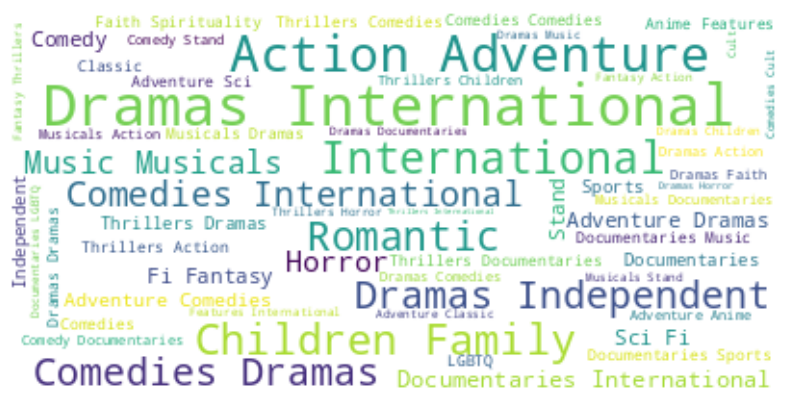

In [50]:
#Preparing the bag of words and finding the most occurring movie genres using WordCloud and also, ignoring the stopwords
text = ' '.join(movies_data_subset['listed_in'].values)
stopwords = set(STOPWORDS)
stopwords |= set(['Movies'])
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(str(text))
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Insight: Popular genres for movies are International, Action, Adventure, Drama, Family & Children, Romantic, Independent. And, few of the least popular ones would be Cult, Classic and Faith.

##TV Shows Genre WordCloud

In [51]:
#Getting the unique values for movie genres
tv_show_data['listed_in'].unique()

array(['International TV Shows', 'TV Dramas', 'TV Mysteries',
       'Crime TV Shows', 'TV Action & Adventure', 'Docuseries',
       'Reality TV', 'Romantic TV Shows', 'TV Comedies', 'TV Horror',
       'British TV Shows', 'Spanish-Language TV Shows', 'TV Thrillers',
       "Kids' TV", 'TV Sci-Fi & Fantasy', 'Anime Series',
       'Korean TV Shows', 'Science & Nature TV', 'Teen TV Shows',
       'TV Shows', 'Stand-Up Comedy & Talk Shows', 'Classic & Cult TV'],
      dtype=object)

In [52]:
#Getting unique rows for title and listed_in combinations to apply the word cloud
tv_show_data_subset = tv_show_data[['title', 'listed_in']]
tv_show_data_subset.drop_duplicates(inplace = True)

<ipython-input-52-0d5466069fdf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_show_data_subset.drop_duplicates(inplace = True)


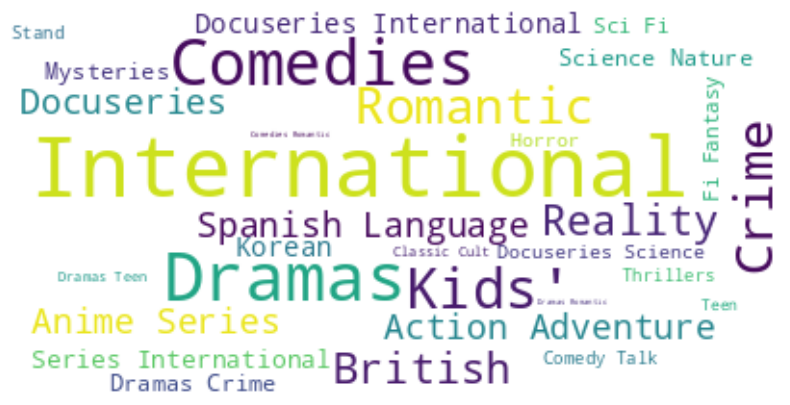

In [53]:
#Preparing the bag of words and finding the most occurring movie genres using WordCloud and alsi ignoring the stopwords
text = ' '.join(tv_show_data_subset['listed_in'].values)
stopwords = set(STOPWORDS)
stopwords |= set(['TV', 'Shows'])
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(str(text))
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Insight: Popular genres for TV shows are International, Crime, Action, Adventure, Drama, Romantic, Comedies and Anime Series. And, few of the least popular ones would be Classic Cult, mysteries, sci-fi and teen.

#Best Time to add Movies

In [54]:
#Extracting the year from the field 'date_added'
movies_data['year_added'] = pd.to_datetime(movies_data['date_added']).dt.year

<ipython-input-54-042e7d3779ad>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_data['year_added'] = pd.to_datetime(movies_data['date_added']).dt.year


In [55]:
#Finding the difference in years among the year when the moview was released and the year when it was added on Netflix
movies_data['diff_in_years'] = movies_data['year_added'] - movies_data['release_year']

<ipython-input-55-478142f578ca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_data['diff_in_years'] = movies_data['year_added'] - movies_data['release_year']


In [56]:
#This will give us the diff in years among release_year and year_added fields for each movie so that then we can operate on this data to get the mode for diff_in_years
data_mode = movies_data[movies_data['release_year'] >= pd.Timestamp.now().year - 10].groupby(['type', 'title']).agg({'diff_in_years' : pd.Series.mode})

In [57]:
#Gives us the number of unique movie titles having that particular diff in years for release_year and year_added fields
data_mode['diff_in_years'].value_counts()

 0    1860
 1    1176
 2     487
 3     347
 4     260
 5     168
 6     115
 7      57
 8      34
-1       2
Name: diff_in_years, dtype: int64

In [58]:
#Finding mode directly for the column 'diff_in_years' alonga axis 0 i.e. for all rows of grouped data
data_mode[['diff_in_years']].mode(axis = 0)

,diff_in_years
0,0


Thus, we can see that the best time to add a movie on the Netflix platform would be within a year duration from the release year.

#Concluding Remarks
Business Insights:
1. The popularity of the **TV shows** has significantly increased especially over the last 4-5 years as compared to the Movies. Especially from the COVID years onwards i.e. 2019 onwards.
2. Over the years, the duration of the movies has lessened i.e. it's mostly **< 200 mins**.
3. '**United States**' is the top country when it comes to the number of movies and TV shows produced.
4. Maximum number of movies are added in the **first week of 'January'** but **month-wise** it's '**July**'.
5. Maximum number of TV shows are added in the **first week of 'July'** but **month-wise** it's '**December**'
6. Popular genres for movies are International, Action, Adventure, Drama, Family & Children, Romantic, Independent. And, few of the least popular ones would be Cult, Classic and Faith.
7. Popular genres for TV shows are International, Crime, Action, Adventure, Drama, Romantic, Comedies and Anime Series. And, few of the least popular ones would be Classic Cult, mysteries, sci-fi and teen.
8. The top countries as per the movie content Netflix has released in are 'United States', 'India', 'United Kingdom', 'Canada' and 'France'.
9. The top countries as per the TV show content Netflix has released in are 'United States', 'United Kingdom', 'Japan', 'South Korea' and Canada'.
10. Top directors as per the number of movies available on Netflix are 'Rajiv Chilaka', 'Jan Suter', 'Raúl Campos'.
11. Top directors as per the number of TV shows available on Netflix are 'Ken Burns', 'Alastair Fothergill'.
12. Top actors as per the number of movies available on Netflix are 'Anupam Kher', 'Shah Rukh Khan', 'Naseeruddin Shah'.
13. Top actors as per the number of TV shows available on Netflix are 'Takahiro Sakurai', 'Yuki Kaji'.
14. It is observed for the movies released in the last 10-15 years that usually with an year from the release year Netflix adds that movie on its streaming platform.
15. Netflix has produced most of the content which falls into 'TV-MA' rating category.


Recommendations for business:
1. Produce more TV shows as it is the more popular content.
2. Release more content in the country 'United States'.
3. Keep the movie duration in the range **100 to 150 mins.**
4. Keep the number of seasons lesser (typically less than 5) for the TV shows.
5. Produce TV content having '**TV-MA**' rating as it's one of the popular rating category when analysed the entire rating distribution data.
6. To target a particular week for producing more content, it is recommended to produce Movies in the first week of 'January' and for TV shows, that's first week of 'July'.
7. Best time to produce the movies i.e. to add a movie on the streaming platform would be 'July' and similarly for TV shows, that is 'December'.
8. Produce more movies which are falling in the genres: **International, Action, Adventure, Drama, Family & Children, Romantic, Independent.**
9. Produce more TV shows which are falling in the genres: **International, Crime, Action, Adventure, Drama, Romantic, Comedies and Anime Series.**
10. Once the movie is released, best time to add it on the Netflix platform would be within a year duration from the release year.


